# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.dummy import DummyRegressor

#Statmodels
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Preprocessing

## Part a

In [ ]:
df = pd.get_dummies(df, columns = ['month', 'day'])
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


## Part b

In [ ]:
df.isna().sum()

X            0
Y            0
FFMC         0
DMC          0
DC           0
ISI          0
temp         0
RH           0
wind         0
rain         0
area         0
month_apr    0
month_aug    0
month_dec    0
month_feb    0
month_jan    0
month_jul    0
month_jun    0
month_mar    0
month_may    0
month_nov    0
month_oct    0
month_sep    0
day_fri      0
day_mon      0
day_sat      0
day_sun      0
day_thu      0
day_tue      0
day_wed      0
dtype: int64

There is no missing value in the dataset.

## Part c

In [ ]:
df.duplicated().sum()

4

We have 4 duplicated rows

In [ ]:
df[df.duplicated()]

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
53,4,3,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,1
100,3,4,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,1,0,0,0
215,4,4,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,0,1,0,0,0,0
303,3,6,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,0


Now let's remove them from dataset

In [ ]:
df.drop_duplicates(inplace=True, ignore_index=True)

## Part d

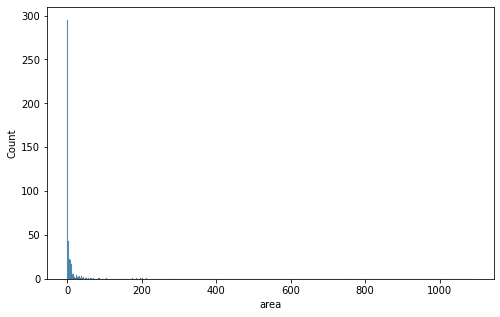

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df['area'], ax=ax)

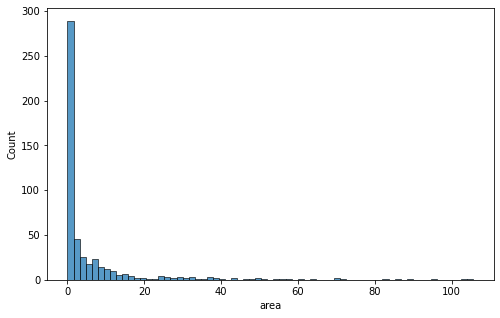

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=df[df['area']<150]['area'], ax=ax)

The histogram indicates that we have right skewness

In [ ]:
skew_val = df['area'].skew()
print(f'Skewness value is: {skew_val}')

Skewness value is: 12.802213419146321


## Part e

In [ ]:
df['area'] = np.sqrt(df['area'])

## Part f

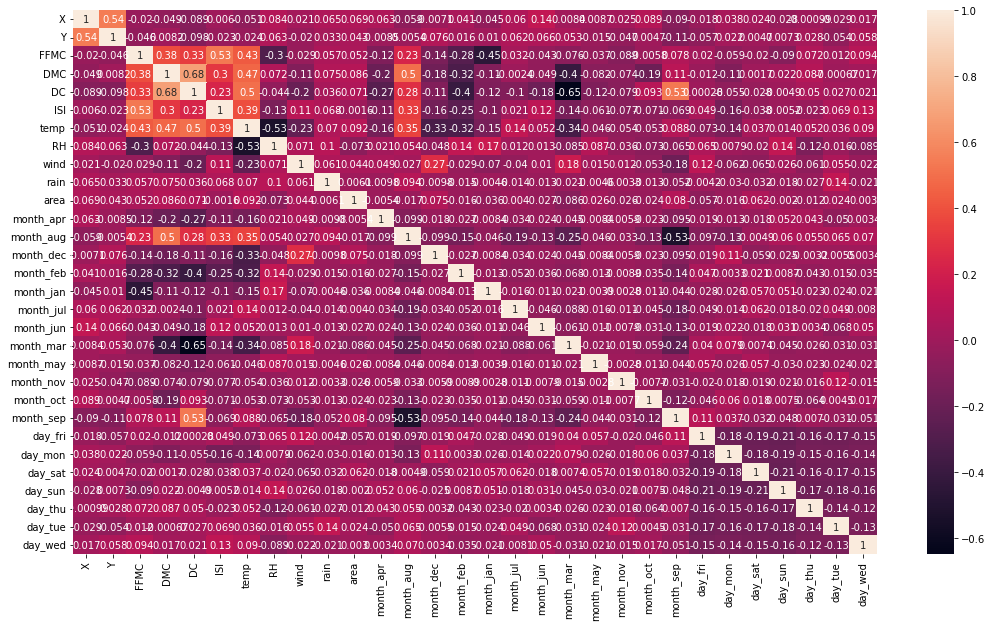

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
corr = df.corr()
sns.heatmap(corr, annot = True, ax=ax)

In [ ]:
corr['area']

X            0.069457
Y            0.042761
FFMC         0.051842
DMC          0.086471
DC           0.071474
ISI         -0.001645
temp         0.092086
RH          -0.072892
wind         0.044000
rain         0.006145
area         1.000000
month_apr   -0.005444
month_aug   -0.017272
month_dec    0.075397
month_feb   -0.016473
month_jan   -0.036367
month_jul    0.004027
month_jun   -0.026587
month_mar   -0.085645
month_may    0.026143
month_nov   -0.025691
month_oct   -0.024119
month_sep    0.080107
day_fri     -0.057373
day_mon     -0.016051
day_sat      0.061701
day_sun     -0.002046
day_thu     -0.012119
day_tue      0.024022
day_wed      0.003036
Name: area, dtype: float64

# Feature selection and Linear Regression

## Part g

In [ ]:
X = df[df.columns[df.columns != 'area']]
y = df['area']

## Part h

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((410, 29), (103, 29), (410,), (103,))

## Part i

In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
y_pred = dummy_regr.predict(X_test)
print(f'Mean Square Error for Dummy Regressor: {mean_squared_error(y_test, y_pred)}')

Mean Square Error for Dummy Regressor: 5.161721863439346


## Part j

In [ ]:
estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred_lin = estimator.predict(X_test)
print(f'Mean Square Error for Linear Regressor: {mean_squared_error(y_test, y_pred_lin)}')

Mean Square Error for Linear Regressor: 4.736999551100443


## Part k

As it's clear, Mean Square Error is reduce from 5.16 in Dummy Regressor to 4.73 in Linear Regression. It indicates that our linear regression model has performed well.

## Part l

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
ols = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
ols.pvalues

const        0.842458
X            0.065723
Y            0.734748
FFMC         0.835382
DMC          0.005413
DC           0.015140
ISI          0.303969
temp         0.122462
RH           0.754094
wind         0.123579
rain         0.886500
month_apr    0.334831
month_aug    0.370123
month_dec    0.017918
month_feb    0.391758
month_jan    0.636329
month_jul    0.905811
month_jun    0.253099
month_mar    0.030794
month_may    0.859723
month_nov    0.337377
month_oct    0.135966
month_sep    0.046942
day_fri      0.508103
day_mon      0.999819
day_sat      0.344846
day_sun      0.849016
day_thu      0.862034
day_tue      0.550251
day_wed      0.830393
dtype: float64

In [ ]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.353
Date:                Sat, 23 Apr 2022   Prob (F-statistic):              0.113
Time:                        08:26:56   Log-Likelihood:                -1290.4
No. Observations:                 513   AIC:                             2637.
Df Residuals:                     485   BIC:                             2755.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5920      2.977      0.199      0.842      -5.257       6.441
X              0.1339      0.073      1.844      0.066      -0.009       0.276
Y             -0.0463      0.137     -0.339      0.735      -0.315       0.222
FFMC           0.0077      0.037      0.208      0.835      -0.065       0.081
DMC            0.0117      0.004      2.794      0.005       0.003       0.020
DC            -0.0069      0.003     -2.438      0.015      -0.012      -0.001
ISI           -0.0414      0.040     -1.029      0.304      -0.120       0.038
temp           0.0771      0.050      1.547      0.122      -0.021       0.175
RH            -0.0044      0.014     -0.313      0.754      -0.032       0.023
wind           0.1323      0.086      1.543      0.124      -0.036       0.301
rain          -0.0683      0.479     -0.143      0.887      -1.009       0.872
month_apr     -1.1645      1.206     -0.965      0.335      -3.535       1.206
month_aug      0.9967      1.111      0.897      0.370      -1.186       3.180
month_dec      2.9939      1.260      2.375      0.018       0.517       5.470
month_feb     -0.8212      0.958     -0.857      0.392      -2.704       1.061
month_jan     -1.0984      2.321     -0.473      0.636      -5.660       3.463
month_jul      0.1110      0.938      0.118      0.906      -1.731       1.953
month_jun     -1.0788      0.943     -1.144      0.253      -2.931       0.774
month_mar     -1.8116      0.836     -2.166      0.031      -3.455      -0.168
month_may      0.3825      2.163      0.177      0.860      -3.868       4.633
month_nov     -2.8159      2.932     -0.960      0.337      -8.577       2.946
month_oct      2.2550      1.510      1.493      0.136      -0.712       5.222
month_sep      2.6432      1.327      1.992      0.047       0.036       5.251
day_fri       -0.3620      0.547     -0.662      0.508      -1.436       0.712
day_mon        0.0001      0.543      0.000      1.000      -1.067       1.068
day_sat        0.5005      0.529      0.946      0.345      -0.540       1.541
day_sun        0.1005      0.528      0.190      0.849      -0.936       1.137
day_thu       -0.0982      0.565     -0.174      0.862      -1.208       1.011
day_tue        0.3244      0.543      0.598      0.550      -0.742       1.391
day_wed        0.1265      0.590      0.214      0.830      -1.034       1.287
==============================================================================
Omnibus:                      477.540   Durbin-Watson:                   1.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17849.809
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      30.769   Cond. No.                     1.09e+16
==============================================================================

W

## Part m

In [ ]:
while ols.pvalues.max() > 0.05:
  print(f'{ols.pvalues.idxmax()}: {ols.pvalues.max()} eliminated')
  X2 = X.drop(ols.pvalues.idxmax(), axis=1)
  X.drop(ols.pvalues.idxmax(), axis=1, inplace=True)
  model = sm.OLS(y,X)
  ols = model.fit()

In [ ]:
X2

,X,temp,month_dec
0,7,8.2,0
1,7,18.0,0
2,7,14.6,0
3,8,8.3,0
4,8,11.4,0
...,...,...,...
508,4,27.8,0
509,2,21.9,0
510,7,21.2,0
511,1,25.6,0


## Part n

In [ ]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
X2_train.shape, X2_test.shape, y_train.shape, y_test.shape

((410, 3), (103, 3), (410,), (103,))

In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X2_train, y_train)
y2_pred = dummy_regr.predict(X2_test)
print(f'Mean Square Error for Dummy Regressor: {mean_squared_error(y_test, y2_pred)}')

Mean Square Error for Dummy Regressor: 5.161721863439346


In [ ]:
estimator = LinearRegression()
estimator.fit(X2_train, y_train)
y2_pred_lin = estimator.predict(X2_test)
print(f'Mean Square Error for Linear Regressor: {mean_squared_error(y_test, y2_pred_lin)}')

Mean Square Error for Linear Regressor: 5.197550996701636


## Part o

In [ ]:
ridge_clf = Ridge(alpha=1.0)
ridge_clf.fit(X2_train, y_train)
y2_pred_ridge = ridge_clf.predict(X2_test)
print(f'Mean Square Error for Ridge Regression: {mean_squared_error(y_test, y2_pred_ridge)}')

Mean Square Error for Ridge Regression: 5.204385796805874


## Part p

In [ ]:
elast_regr = ElasticNet(random_state=0, alpha=1)
elast_regr.fit(X2_train, y_train)
y2_pred_elastic = elast_regr.predict(X2_test)
print(f'Mean Square Error for ElasticNet Regression: {mean_squared_error(y_test, y2_pred_elastic)}')

Mean Square Error for ElasticNet Regression: 5.218771936600787


## Part q

In [ ]:
elast_regr = ElasticNet(random_state=0, alpha=1)
elast_regr.fit(X2_train, y_train)
y2_pred_elastic = elast_regr.predict(X2_test)
print(f'Mean Absolute Error for ElasticNet Regression: {mean_absolute_error(y_test, y2_pred_lin)}')

Mean Absolute Error for ElasticNet Regression: 1.756452562306168


# Model Selection

## Part r

In [ ]:
alphas = np.arange(1, 201)
MSE = np.empty(len(alphas))

for i, a in enumerate(alphas):
  elast_regr = ElasticNet(alpha=a, random_state=1)
  MSE[i] = np.mean(cross_val_score(elast_regr, X_train, y_train, cv=5, scoring="neg_mean_squared_error"))

## Part s

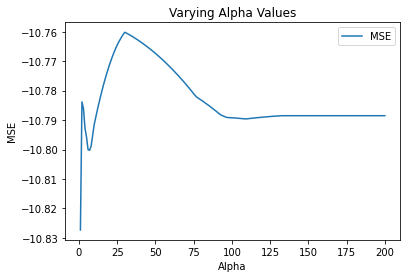

In [ ]:
plt.title('Varying Alpha Values')
plt.plot(alphas, MSE, label = 'MSE')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

In [ ]:
print(f'Min MSE is {max(MSE)} for alpha={np.argmax(MSE[1:])+2}')

Min MSE is -10.760193789503706 for alpha=30


Alpha: Constant that multiplies the penalty terms.